# 📊 Marketing Campaign Optimization Project


This is a mock dataset aiming to show how to conduct analysis of marketing campaign effectiveness. The analysis is based on true use cases seen from my work experience as a senior data analyst.

Questions to answer:

    - Which campaign and in which channel performs the best?
    
    - Which segment is highest in the conversion rate?
    
    - Which campaigns and in which channel should we stop or continue to run?
    
    - Which campaigns are the most effective according to t-test versus Bayesian approach?


Structure:

    - EDA
    
    - Data analysis by key attributes: channel, CAMPAIGN_ID, region and segment
        
        - A/B test for conversions
        
        - t-test
         
         -Bayesian
         
         -Segmentation analysis
    


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('marketing_campaign_dataset.csv')
df.head()

,Campaign_ID,Date,Channel,Region,Segment,Spend_USD,Impressions,Clicks,CTR,Conversions,...,Landing_Page,Gender,Group,First_Seen_Date,Conversion_Rate,CPC,CPA,Week,Month,Quarter
0,CAMPAIGN_2,2023-01-07,Display Ads,South,Professionals,1009.32,14434,2000,0.138562,537,...,Promo Page,Male,A,2023-01-05,0.268500,0.504660,1.879553,1,1,1
1,CAMPAIGN_4,2023-03-01,Social Media,North,Professionals,4352.91,92924,10550,0.113534,779,...,Homepage,Male,B,2023-02-19,0.073839,0.412598,5.587818,9,3,1
2,CAMPAIGN_5,2023-02-09,SMS,East,Young Adults,737.93,13676,1069,0.078166,117,...,Signup Page,Female,A,2023-01-11,0.109448,0.690299,6.307094,6,2,1
3,CAMPAIGN_7,2023-01-21,Social Media,East,Retirees,3548.64,93349,2167,0.023214,437,...,Homepage,Male,B,2023-01-13,0.201661,1.637582,8.120458,3,1,1
4,CAMPAIGN_8,2023-06-12,Display Ads,South,Retirees,2260.57,88841,5394,0.060715,1519,...,Signup Page,Other,A,2023-05-26,0.281609,0.419090,1.488196,24,6,2


In [3]:
# Convert dates and drop unnecessary column
df['Date'] = pd.to_datetime(df['Date'])
df['First_Seen_Date'] = pd.to_datetime(df['First_Seen_Date'])

## 2. Exploratory Data Analysis (EDA)

In [11]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Campaign_ID      500 non-null    object 
 1   Date             500 non-null    object 
 2   Channel          500 non-null    object 
 3   Region           500 non-null    object 
 4   Segment          500 non-null    object 
 5   Spend_USD        500 non-null    float64
 6   Impressions      500 non-null    int64  
 7   Clicks           500 non-null    int64  
 8   CTR              500 non-null    float64
 9   Conversions      500 non-null    int64  
 10  User_ID          500 non-null    object 
 11  Device           500 non-null    object 
 12  Source           500 non-null    object 
 13  Landing_Page     500 non-null    object 
 14  Gender           500 non-null    object 
 15  Group            500 non-null    object 
 16  First_Seen_Date  500 non-null    object 
 17  Conversion_Rate 

In [16]:
# Missing values
print("\n Missing values by column:\n")
print(df.isnull().sum())

# Unique categorial values by attributes
categorical_cols = df.select_dtypes(include='object').columns
print("\n Uniq values by attributes:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")


 Missing values by column:

Campaign_ID        0
Date               0
Channel            0
Region             0
Segment            0
Spend_USD          0
Impressions        0
Clicks             0
CTR                0
Conversions        0
User_ID            0
Device             0
Source             0
Landing_Page       0
Gender             0
Group              0
First_Seen_Date    0
Conversion_Rate    0
CPC                0
CPA                0
Week               0
Month              0
Quarter            0
dtype: int64

 Uniq values by attributes:
Campaign_ID: 10 unique values
Channel: 5 unique values
Region: 4 unique values
Segment: 4 unique values
User_ID: 500 unique values
Device: 3 unique values
Source: 3 unique values
Landing_Page: 3 unique values
Gender: 3 unique values
Group: 2 unique values


# Data exploration

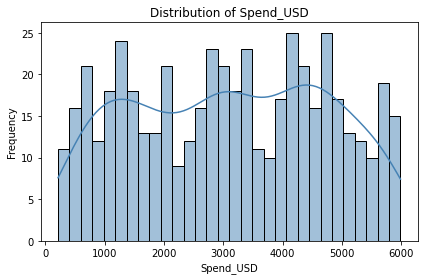

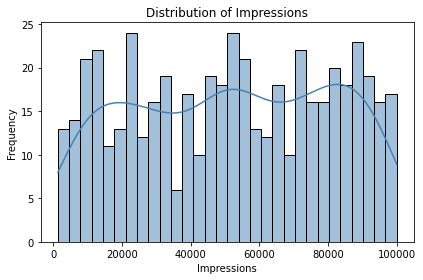

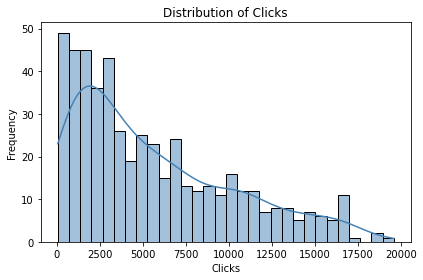

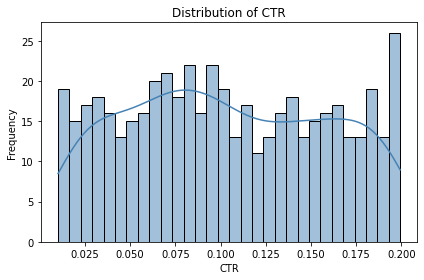

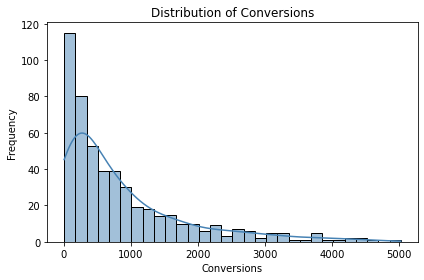

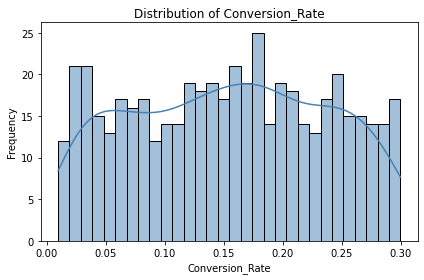

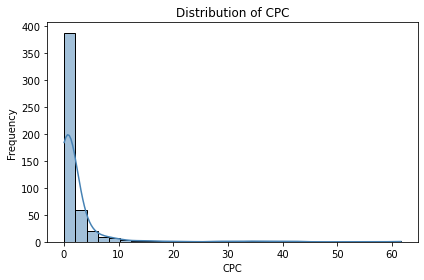

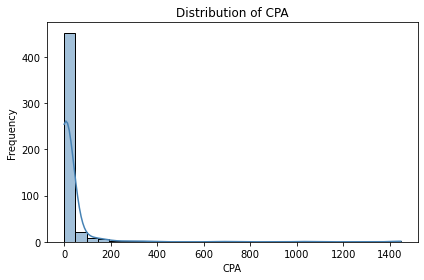

In [17]:
# ----------------------------
# 1. Distribution of Numerical Features
# ----------------------------
numerical_features = [
    'Spend_USD', 'Impressions', 'Clicks', 'CTR',
    'Conversions', 'Conversion_Rate', 'CPC', 'CPA'
]

for feature in numerical_features:
    plt.figure()
    sns.histplot(df[feature], kde=True, bins=30, color='steelblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


In [ ]:
# Распределение по каналам
plt.figure(figsize=(10, 5))
sns.countplot(x='Channel', data=df, order=df['Channel'].value_counts().index)
plt.title('Split by channel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Распределение по регионам
plt.figure(figsize=(8, 5))
sns.countplot(x='Region', data=df, order=df['Region'].value_counts().index)
plt.title('Split by region')
plt.tight_layout()
plt.show()

# Распределение по сегментам
plt.figure(figsize=(8, 5))
sns.countplot(x='Segment', data=df, order=df['Segment'].value_counts().index)
plt.title('Split by segment')
plt.tight_layout()
plt.show()

# Boxplot по Spend_USD
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Channel', y='Spend_USD')
plt.title('Spend по каналам')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


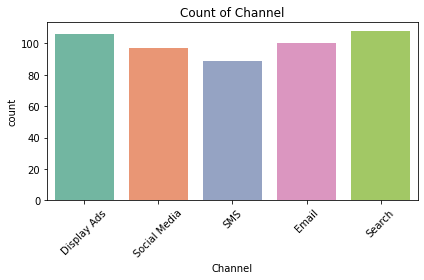

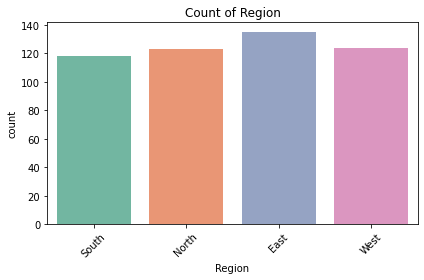

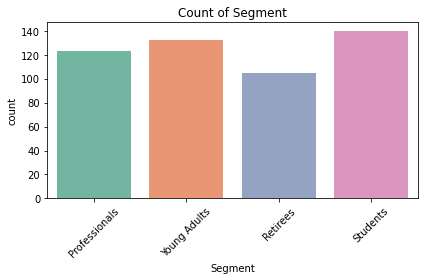

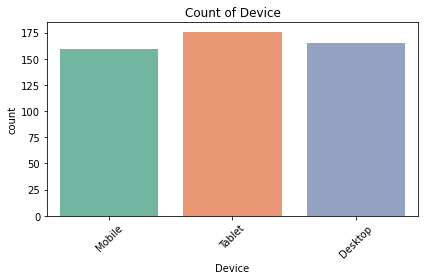

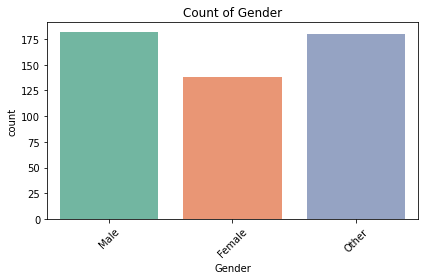

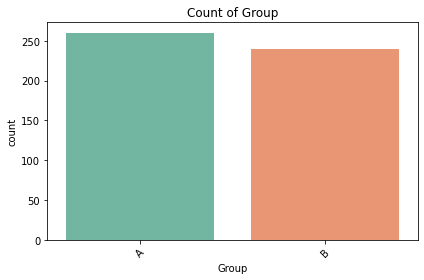

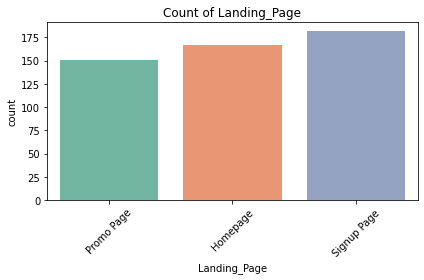

In [18]:
# ----------------------------
# 2. Count Plots for Categorical Features
# ----------------------------
categorical_features = [
    'Channel', 'Region', 'Segment', 'Device',
    'Gender', 'Group', 'Landing_Page'
]

for feature in categorical_features:
    plt.figure()
    sns.countplot(data=df, x=feature, palette='Set2')
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


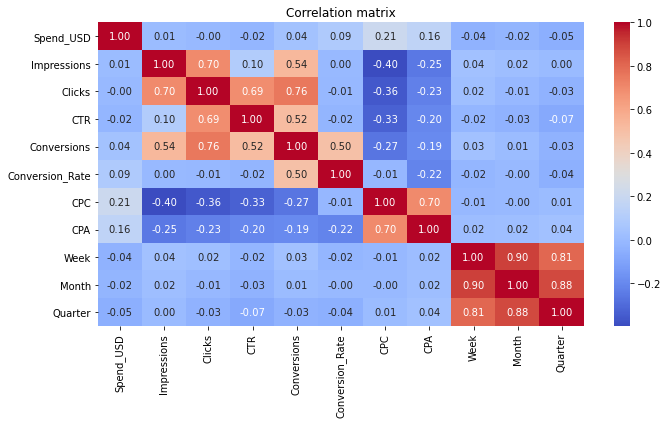

In [19]:
# Pairplot 
# sns.pairplot(df[['Spend_USD', 'Impressions', 'Clicks', 'Conversions', 'CTR', 'Conversion_Rate']])

# Корреляционная матрица
import matplotlib.pyplot as plt
import seaborn as sns

# Оставляем только числовые столбцы вручную
numeric_df = df.select_dtypes(include=['number'])

# Строим корреляционную матрицу
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix')
plt.tight_layout()
plt.show()

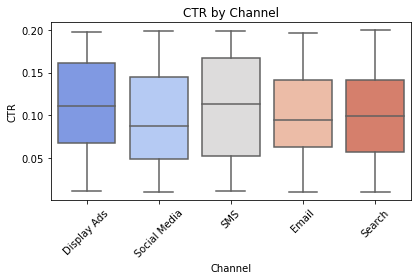

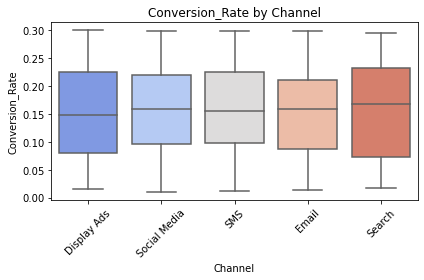

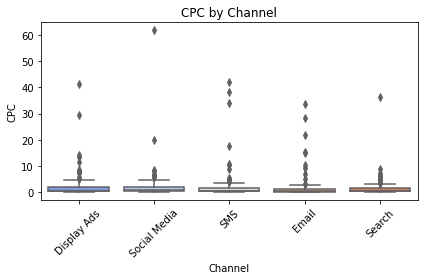

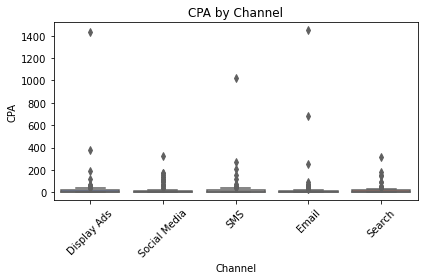

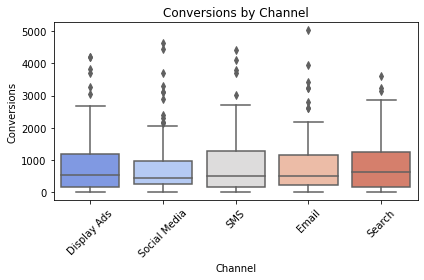

In [22]:
# ----------------------------
# 3. Box Plots of Performance Metrics by Channel
# ----------------------------
performance_metrics = ['CTR', 'Conversion_Rate', 'CPC', 'CPA','Conversions']

for metric in performance_metrics:
    plt.figure()
    sns.boxplot(data=df, x='Channel', y=metric, palette='coolwarm')
    plt.title(f'{metric} by Channel')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Cohort analysis

In [34]:
# Group by user to get user-level data
user_level_df = df.groupby('User_ID').agg({
    'Campaign_ID': 'first',
    'Date': 'min',  # Earliest activity date
    'Channel': 'first',
    'Region': 'first',
    'Segment': 'first',
    'Spend_USD': 'sum',
    'Impressions': 'sum',
    'Clicks': 'sum',
    'CTR': 'mean',
    'Conversions': 'sum',
    'Device': 'first',
    'Source': 'first',
    'Landing_Page': 'first',
    'Gender': 'first',
    'Group': 'first',
    'First_Seen_Date': 'min',
    'Conversion_Rate': 'mean',
    'CPC': 'mean',
    'CPA': 'mean',
    'Week': 'min',
    'Month': 'min',
    'Quarter': 'min'
}).reset_index()





In [35]:
user_level_df.head()

,User_ID,Campaign_ID,Date,Channel,Region,Segment,Spend_USD,Impressions,Clicks,CTR,...,Landing_Page,Gender,Group,First_Seen_Date,Conversion_Rate,CPC,CPA,Week,Month,Quarter
0,002962bd-a415-4d66-b7f3-46c42beb215a,CAMPAIGN_4,2023-04-20,Search,North,Young Adults,1437.84,11215,394,0.035132,...,Homepage,Male,B,2023-03-25,0.073604,3.649340,49.580690,16,4,2
1,002a4985-3dfc-418b-9edb-6badab7ec70a,CAMPAIGN_9,2023-01-24,Email,East,Young Adults,4043.54,81482,11406,0.139982,...,Homepage,Male,A,2023-01-01,0.229528,0.354510,1.544515,4,1,1
2,0039ab95-b3f3-46b5-96fa-478e725d5001,CAMPAIGN_8,2023-06-07,Social Media,North,Young Adults,740.50,87427,3039,0.034760,...,Signup Page,Female,B,2023-05-27,0.184929,0.243666,1.317616,23,6,2
3,006ff2b4-f13d-46f6-bb0d-4f079ec60d03,CAMPAIGN_6,2023-05-11,SMS,North,Professionals,4793.98,32029,5130,0.160167,...,Promo Page,Female,A,2023-04-22,0.017544,0.934499,53.266444,19,5,2
4,00d755c8-5d4a-48ca-81b5-e1ab853c6cee,CAMPAIGN_1,2023-06-28,Social Media,West,Professionals,5642.85,64192,10271,0.160004,...,Signup Page,Other,A,2023-06-15,0.120534,0.549396,4.558037,26,6,2


In [37]:
user_level_df['Activity_Date'] = pd.to_datetime(user_level_df['First_Seen_Date'])  # if not datetime yet
user_level_df['Activity_Month'] = user_level_df['First_Seen_Date'].dt.to_period('M')


In [38]:
# If you have an 'Activity_Month' as a datetime or period representing user activity month

# Step 1: Find first activity month (cohort month) for each user
user_first_month = user_level_df.groupby('User_ID')['Activity_Month'].min().reset_index()
user_first_month.rename(columns={'Activity_Month': 'Cohort_Month'}, inplace=True)

# Step 2: Merge back to original df to assign each user’s cohort month
user_level_df = user_level_df.merge(user_first_month, on='User_ID', how='left')


In [40]:
user_level_df.head()

,User_ID,Campaign_ID,Date,Channel,Region,Segment,Spend_USD,Impressions,Clicks,CTR,...,Conversion_Rate,CPC,CPA,Week,Month,Quarter,Activity_Date,Activity_Month,Cohort_Month,Cohort_Index
0,002962bd-a415-4d66-b7f3-46c42beb215a,CAMPAIGN_4,2023-04-20,Search,North,Young Adults,1437.84,11215,394,0.035132,...,0.073604,3.649340,49.580690,16,4,2,2023-03-25,2023-03-01,2023-03-01,1
1,002a4985-3dfc-418b-9edb-6badab7ec70a,CAMPAIGN_9,2023-01-24,Email,East,Young Adults,4043.54,81482,11406,0.139982,...,0.229528,0.354510,1.544515,4,1,1,2023-01-01,2023-01-01,2023-01-01,1
2,0039ab95-b3f3-46b5-96fa-478e725d5001,CAMPAIGN_8,2023-06-07,Social Media,North,Young Adults,740.50,87427,3039,0.034760,...,0.184929,0.243666,1.317616,23,6,2,2023-05-27,2023-05-01,2023-05-01,1
3,006ff2b4-f13d-46f6-bb0d-4f079ec60d03,CAMPAIGN_6,2023-05-11,SMS,North,Professionals,4793.98,32029,5130,0.160167,...,0.017544,0.934499,53.266444,19,5,2,2023-04-22,2023-04-01,2023-04-01,1
4,00d755c8-5d4a-48ca-81b5-e1ab853c6cee,CAMPAIGN_1,2023-06-28,Social Media,West,Professionals,5642.85,64192,10271,0.160004,...,0.120534,0.549396,4.558037,26,6,2,2023-06-15,2023-06-01,2023-06-01,1


In [48]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import OneHotEncoder

# Define the outcome variable
outcome = 'Spend_USD'

# Covariates to match on
covariates = ['Region', 'Segment', 'Channel']

# One-hot encode categorical covariates once
df_encoded = pd.get_dummies(df[covariates], drop_first=True)
X_all = df_encoded

# Store results
att_results = []

# Loop through all campaigns
for i in range(1, 10):
    campaign_id = f'CAMPAIGN_{i}'
    
    df_copy = df.copy()
    df_copy['Treatment'] = (df_copy['Campaign_ID'] == campaign_id).astype(int)

    # Outcome vector
    y = df_copy['Treatment']
    
    # Refit logistic regression for this campaign
    logit = LogisticRegression(max_iter=1000)
    logit.fit(X_all, y)
    
    # Add propensity scores
    df_copy['propensity_score'] = logit.predict_proba(X_all)[:, 1]

    # Split treated and control
    treated = df_copy[df_copy['Treatment'] == 1]
    control = df_copy[df_copy['Treatment'] == 0]
    
    if treated.empty or control.empty:
        att_results.append({'Campaign_ID': campaign_id, 'ATT': None, 'Note': 'No treated or control samples'})
        continue

    # Nearest neighbor matching
    nn = NearestNeighbors(n_neighbors=1)
    nn.fit(control[['propensity_score']])
    
    distances, indices = nn.kneighbors(treated[['propensity_score']])
    matched_control = control.iloc[indices.flatten()].copy()

    # Calculate ATT
    att = (treated[outcome].values - matched_control[outcome].values).mean()
    att_results.append({'Campaign_ID': campaign_id, 'ATT': att, 'Note': 'OK'})

# Convert results to DataFrame
att_df = pd.DataFrame(att_results)

# Show the results
print(att_df)


  Campaign_ID         ATT Note
0  CAMPAIGN_1  314.980435   OK
1  CAMPAIGN_2  209.802292   OK
2  CAMPAIGN_3 -329.749492   OK
3  CAMPAIGN_4 -933.204800   OK
4  CAMPAIGN_5 -352.287826   OK
5  CAMPAIGN_6  318.121017   OK
6  CAMPAIGN_7  169.019592   OK
7  CAMPAIGN_8 -307.882075   OK
8  CAMPAIGN_9  181.524474   OK


/hdd/bigdata/python_envs/external/external/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/hdd/bigdata/python_envs/external/external/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/hdd/bigdata/python_envs/external/external/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/hdd/bigdata/python_envs/external/external/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/hdd/bigdata/python_envs/external/external/lib/python3.7/site-pa

## 3. A/B Testing (CTR & Conversions by Channel)

In [47]:
import pandas as pd
from scipy.stats import ttest_ind

# Suppose your DataFrame is df

# Channels to compare
channels = ['Email', 'Social Media']

# User segments to analyze
segments = df['Segment'].unique()

# Store test results
results = []

for segment in segments:
    # Filter data for this segment and channels
    segment_df = df[df['Segment'] == segment]
    
    email_ctr = segment_df[segment_df['Channel'] == 'Email']['CTR']
    social_ctr = segment_df[segment_df['Channel'] == 'Social Media']['CTR']
    
    # Only perform t-test if both groups have enough samples
    if len(email_ctr) > 1 and len(social_ctr) > 1:
        t_stat, p_value = ttest_ind(email_ctr, social_ctr, equal_var=False)  # Welch's t-test
        results.append({
            'Segment': segment,
            'Email_mean_CTR': email_ctr.mean(),
            'Social_mean_CTR': social_ctr.mean(),
            't_stat': t_stat,
            'p_value': p_value,
            'Email_n': len(email_ctr),
            'Social_n': len(social_ctr)
        })
    else:
        results.append({
            'Segment': segment,
            'Email_mean_CTR': email_ctr.mean() if len(email_ctr) > 0 else None,
            'Social_mean_CTR': social_ctr.mean() if len(social_ctr) > 0 else None,
            't_stat': None,
            'p_value': None,
            'Email_n': len(email_ctr),
            'Social_n': len(social_ctr)
        })

# Convert to DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Apply Bonferroni correction for multiple comparisons
alpha = 0.05
results_df['p_adj'] = results_df['p_value'] * len(results_df)
results_df['Significant'] = results_df['p_adj'] < alpha

print(results_df)


         Segment  Email_mean_CTR  Social_mean_CTR    t_stat   p_value  \
0  Professionals        0.097131         0.098050 -0.058789  0.953373   
1   Young Adults        0.105150         0.106314 -0.090015  0.928636   
2       Retirees        0.096087         0.086765  0.541641  0.591315   
3       Students        0.090473         0.097074 -0.396505  0.693495   

   Email_n  Social_n     p_adj  Significant  
0       26        23  3.813490        False  
1       33        26  3.714545        False  
2       18        21  2.365261        False  
3       23        27  2.773981        False  


# 4.Bayesian A/B testing

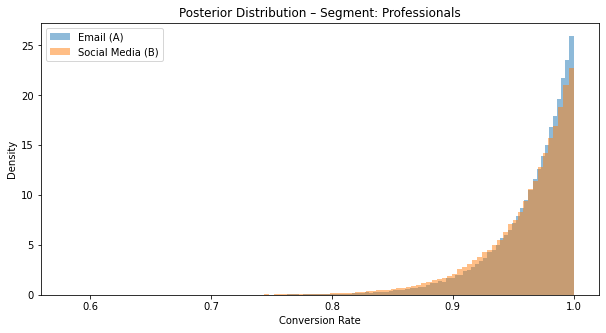

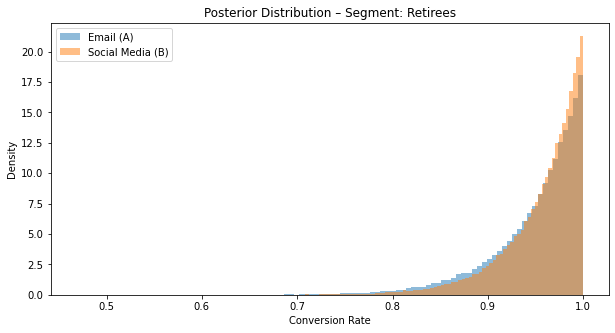

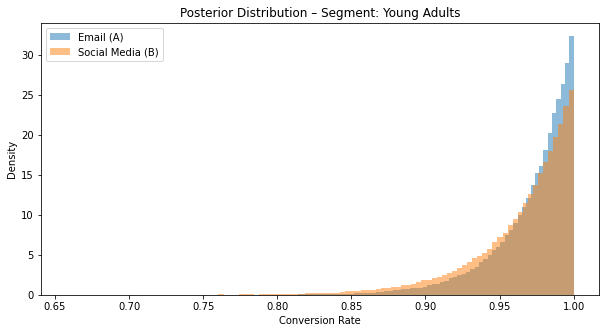

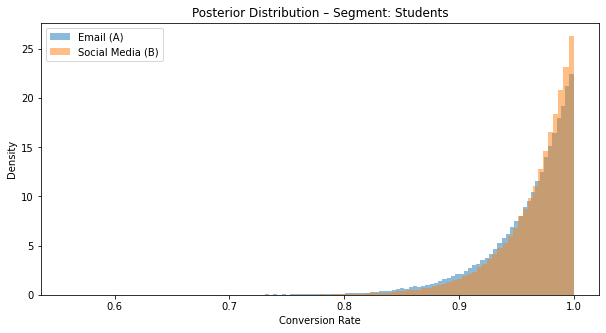

         Segment  Prob_B_Better  Lift (%) Note
0  Professionals          47.04     -0.29   OK
1       Retirees          53.84      0.98   OK
2   Young Adults          44.20     -0.67   OK
3       Students          53.83      0.75   OK


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define your A/B groups — for example, Email (A) vs. Social Media (B)
group_A_channel = 'Email'
group_B_channel = 'Social Media'
segment_col = 'Segment'
outcome_col = 'Conversion_Rate'  # or 'CTR', etc.

# Filter only relevant groups
df_ab = df[df['Channel'].isin([group_A_channel, group_B_channel])]

# Store results
results = []

# Loop through each unique segment
for segment in df_ab[segment_col].unique():
    df_segment = df_ab[df_ab[segment_col] == segment]

    # Group A
    group_A = df_segment[df_segment['Channel'] == group_A_channel]
    conversions_A = (group_A[outcome_col] > 0).sum()
    trials_A = len(group_A)

    # Group B
    group_B = df_segment[df_segment['Channel'] == group_B_channel]
    conversions_B = (group_B[outcome_col] > 0).sum()
    trials_B = len(group_B)

    # Skip if not enough data
    if trials_A < 10 or trials_B < 10:
        results.append({
            'Segment': segment,
            'Note': 'Too few samples',
            'Prob_B_Better': None,
            'Lift (%)': None
        })
        continue

    # Priors
    alpha_prior, beta_prior = 1, 1

    # Posterior distributions
    posterior_A = beta(alpha_prior + conversions_A, beta_prior + trials_A - conversions_A)
    posterior_B = beta(alpha_prior + conversions_B, beta_prior + trials_B - conversions_B)

    # Draw samples
    samples_A = posterior_A.rvs(100000)
    samples_B = posterior_B.rvs(100000)

    # Bayesian comparison
    prob_B_better = np.mean(samples_B > samples_A)
    lift = (samples_B - samples_A) / samples_A

    results.append({
        'Segment': segment,
        'Prob_B_Better': round(prob_B_better * 100, 2),
        'Lift (%)': round(np.mean(lift) * 100, 2),
        'Note': 'OK'
    })

    # Optional: Plot posterior for each segment
    plt.figure(figsize=(10, 5))
    plt.hist(samples_A, bins=100, alpha=0.5, label=f"{group_A_channel} (A)", density=True)
    plt.hist(samples_B, bins=100, alpha=0.5, label=f"{group_B_channel} (B)", density=True)
    plt.title(f"Posterior Distribution – Segment: {segment}")
    plt.xlabel("Conversion Rate")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)


# Causal inference 

In [46]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors

# Assuming df is your DataFrame

# Define treatment: users exposed to CAMPAIGN_1
df['Treatment'] = (df['Campaign_ID'] == 'CAMPAIGN_1').astype(int)

# Outcome variable (choose one)
outcome = 'Spend_USD'

# Covariates for matching (example)
covariates = ['Region', 'Segment', 'Channel']

# One-hot encode categorical covariates
df_encoded = pd.get_dummies(df[covariates], drop_first=True)
X = df_encoded
y = df['Treatment']

# Fit propensity score model
logit = LogisticRegression(max_iter=1000)
logit.fit(X, y)
df['propensity_score'] = logit.predict_proba(X)[:,1]

# Separate treated and control
treated = df[df['Treatment'] == 1]
control = df[df['Treatment'] == 0]

# Nearest neighbor matching based on propensity score
nn = NearestNeighbors(n_neighbors=1)
nn.fit(control[['propensity_score']])

distances, indices = nn.kneighbors(treated[['propensity_score']])
matched_control = control.iloc[indices.flatten()]

# Calculate ATT
att = (treated[outcome].values - matched_control[outcome].values).mean()
print(f'Estimated Average Treatment Effect on Treated (ATT) for {outcome}: {att}')


Estimated Average Treatment Effect on Treated (ATT) for Spend_USD: 314.9804347826085


/hdd/bigdata/python_envs/external/external/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# 4. Predictive Modeling

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create binary target: High Conversion
df['High_Conversion'] = (df['Conversions'] > df['Conversions'].median()).astype(int)

# One-hot encode categorical variables
X = pd.get_dummies(df[['Channel', 'Region', 'Segment']], drop_first=True)
X['Spend_USD'] = df['Spend_USD']
X['CTR'] = df['CTR']
y = df['High_Conversion']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[87  6]
 [18 89]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        93
           1       0.94      0.83      0.88       107

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.89      0.88      0.88       200



/hdd/bigdata/python_envs/external/external/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
